(400, 640)


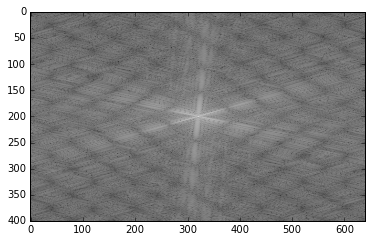

In [2]:
import numpy as np
from skimage import io
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#Load in character A
f = io.imread('characters/A1.GIF')   # read in image
f_f = np.array(f, dtype=float)
#print(f_f)

# do fourier transform
z = np.fft.fft2(f_f)
print(z.shape)

# puts u=0,v=0 in the centre
q = np.fft.fftshift(z)

#np.copyto(new, z, no, )
# magnitude spectrum
Magq =  np.absolute(q)

# phase spectrum
Phaseq = np.angle(q)           

#Plot graph
fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('on')
# Usually for viewing purposes:
# io
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) 

# do inverse fourier transform
# w = np.fft.ifft2( np.fft.ifftshift(q) ) 
# 
# fig2 = plt.figure()
# ax2  = fig2.add_subplot( 111 )
# ax2.axis('off')
#  io.
# ax2.imshow( np.array(w,dtype=int), cmap='gray' )

plt.show()

In [41]:
def fftLetters(letter):
    ffts=[]
    for i in range(1,11):
        f = io.imread('characters/{}{}.GIF'.format(letter, i))                       # Read in image
        f_f = np.array(f, dtype=float)                           # Convert to array
        z = np.fft.fft2(f_f)                                     # Apply fft to array
        
        q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
        Magq =  np.absolute(q)                                   # Magnitude spectrum
        #Phaseq = np.angle(q)                                     # Phase spectrum
        ffts.append(Magq)
    
    x = np.zeros((400,640))
    x = np.sum (ffts, axis=0)
    
    return x    


                        
def printAllSumLetters():
    
    sumS = fftLetters("S")
    sumT = fftLetters("T")
    sumV = fftLetters("V")
    print(sumS[1,1])

    figure = plt.figure(figsize=(25,25))


    ax1  = figure.add_subplot( 3,3,1 )
    ax1.axis('on')
    ax1.set_title("S")
    ax1.imshow( np.log( np.absolute(sumS) + 1 ), cmap='gray' )

    ax2  = figure.add_subplot( 3,3,2 )
    ax2.axis('on')
    ax2.set_title("T" )
    ax2.imshow( np.log( np.absolute(sumT) + 1 ), cmap='gray' )

    ax3  = figure.add_subplot( 3,3,3 )
    ax3.axis('on')
    ax3.set_title("V" )
    ax3.imshow( np.log( np.absolute(sumV) + 1 ), cmap='gray' )
    plt.show()
    return

def printImg(img):
    w = np.fft.ifft2( np.fft.ifftshift(img) ) 
# 
    fig2 = plt.figure()
    ax2  = fig2.add_subplot( 111 )
    ax2.axis('off')
#  io.
    ax2.imshow( np.array(w,dtype=int), cmap='gray' )
    return

3177.70582824


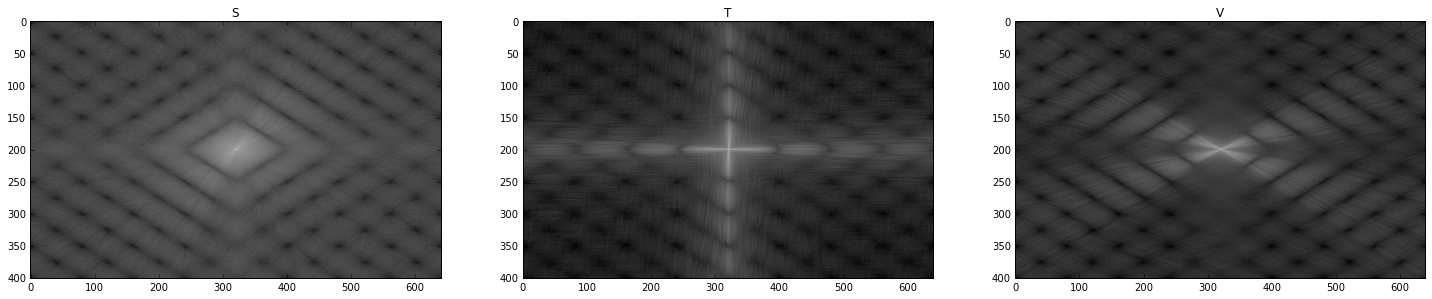

/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:53: ComplexWarning: Casting complex values to real discards the imaginary part


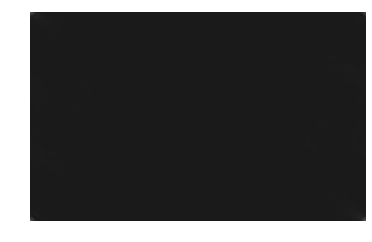

In [42]:
printAllSumLetters()
printImg(fftLetters("S"))

In [ ]:
# //pass all magnitudes to a function and return only the ones needed in that feature

# Calculate magniture for that letter

def calcMag(letter, number):
    f = io.imread('characters/{}{}.GIF'.format(letter, number))                       # Read in image
    f_f = np.array(f, dtype=float)                           # Convert to array
    z = np.fft.fft2(f_f)                                     # Apply fft to array

    q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
    Magq =  np.absolute(q)                                   # Magnitude spectrum
    
    return Magq   

def box1(magMatrix):
    totalMag = 0
    for x in range(0,150):
        for y in range(280,360):
            mag = magMatrix[x][y]
            power = mag*mag
            totalMag = totalMag+power
    return totalMag

def r1(mag):
    inner = 150
    outer = 200
    w, h = len(mag[0]), len(mag)
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : mag[y][x] if inRing(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def ring1(img):
    m = max([max(row) for row in img])
    inner = 150
    outer = 200
    w, h = len(img[0]), len(img)
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : (m + img[y][x]) / 2 if inRing(x, y) else img[y][x]
    return [[filterVals(x, y) for x in range(w)] for y in range(h)]

def ring(mag):
    inner = 150
    outer = 200
    w, h = len(mag[0]), len(mag)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()